# Regresión Lineal: Costo de un incidente de seguridad
En este caso se explican los fundamentos básicos de la regresión lineal aplicada a un caso sencillo aplicada a un caso sencillo relacionado con la ciberseguridad
### Enunciado del ejercicio
El ejercicio conssite en predecir el costo de un incidente de seguridad en base al numero de equipos que se ven afectados. El DataSet es generado de manera aleatoria.

# 1.- Generación del DataSet

In [1]:
import numpy as np
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
print ("La longitud del DataSet es ", len(x))

La longitud del DataSet es  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

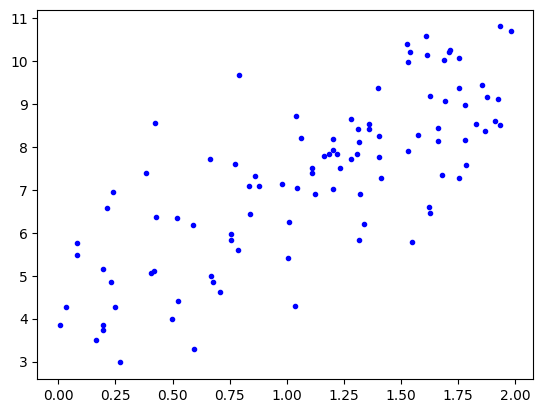

In [3]:
plt.plot (x, y, "b.")
plt.show()

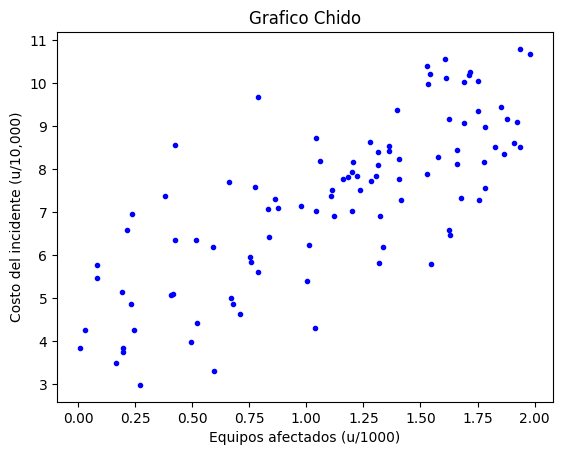

In [4]:
plt.plot (x, y, "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': x.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.978196,7.141575
1,0.774635,7.592828
2,1.662234,8.441466
3,1.233284,7.510938
4,0.196873,3.844716
5,0.878043,7.093117
6,1.853727,9.448029
7,1.779914,8.171497
8,0.756107,5.831574
9,1.782429,8.983296


In [7]:
# Escalado del Número de equipos afectados.
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado el Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,978,71415
1,774,75928
2,1662,84414
3,1233,75109
4,196,38447
5,878,70931
6,1853,94480
7,1779,81714
8,756,58315
9,1782,89832


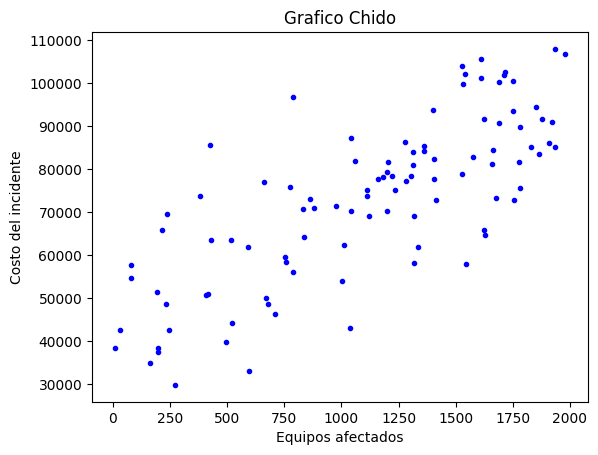

In [8]:
# Representación Gráfica de DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 4.- Cosntruccion del Modelo 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construcción del modelo y ajuste de la hipotesis
lin_reg=LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [11]:
# Parametro tetha 0
lin_reg.intercept_


np.float64(43840.8259063195)

In [12]:
# Parametro Tetha 1
lin_reg.coef_

array([26.02541729])

In [13]:
# Predicción para el valor minimo y maximo del DataSet
x_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

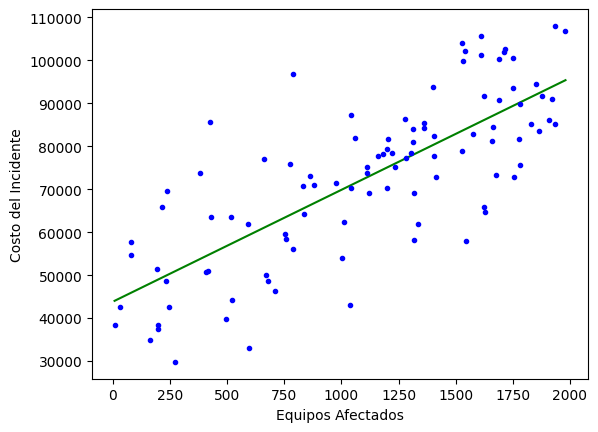

In [14]:
# Representación gráfica de la función de Hipótesis generada.
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Predicción de nuevos ejemplos.

In [15]:
x_new = np.array([[1255]]) # Número de equipos Afectados

# Predicción del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)

print("El costo del incidente sería: $", int(Costo[0]))

El costo del incidente sería: $ 76502


<function matplotlib.pyplot.show(close=None, block=None)>

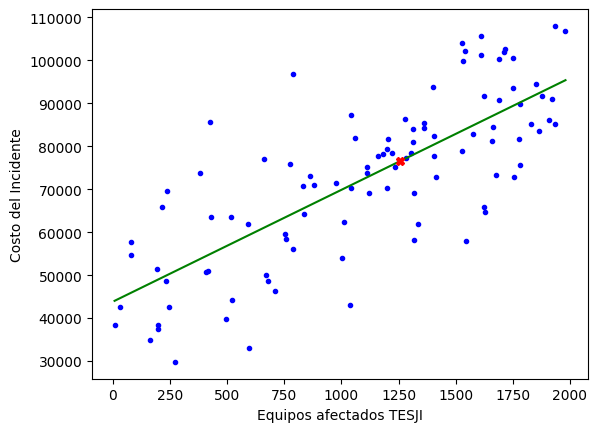

In [16]:
plt.plot (df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot (x_new, Costo, "rX")
plt.xlabel("Equipos afectados TESJI")
plt.ylabel ("Costo del Incidente")
plt.show